# Chapter4: Classification

* Predict qualitative response (categorical)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/ISLR_data/Default.csv')

In [4]:
df.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

In [5]:
X = df['balance']
y = 1*(df['default']=='Yes')

# Logistic Regression

Why not Linear Regression ?

* order ‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤ y (response) ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏ä‡πà‡∏ô 0, 1, 2 ‡∏°‡∏µ‡∏ú‡∏•‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥ Linear regression ‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á 0 ‡πÅ‡∏•‡∏∞ 1 ‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏°‡∏≤‡∏¢‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÑ‡∏£ order ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á 0 ‡πÑ‡∏õ 1 ‡∏Å‡∏±‡∏ö 1 ‡πÑ‡∏õ 2 ‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏ó‡πà‡∏≤‡∏Å‡∏±‡∏ô‡πÑ‡∏´‡∏° ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏ô‡∏µ‡πâ‡∏™‡πà‡∏á‡∏ú‡∏•‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡∏ó‡∏≥ linear regression ‡∏ã‡∏∂‡πà‡∏á‡πÉ‡∏ô‡∏ó‡∏≤‡∏á‡∏õ‡∏è‡∏¥‡∏ö‡∏±‡∏ï‡∏¥‡πÄ‡∏£‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ó‡∏≤‡∏á‡∏£‡∏π‡πâ‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÅ‡∏ô‡πà‡∏ä‡∏±‡∏î ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏ä‡πà‡∏ô‡∏Å‡∏≤‡∏£ classify ‡∏ä‡∏∑‡πà‡∏≠‡πÇ‡∏£‡∏Ñ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏ô ‡πÅ‡∏ï‡πà‡πÉ‡∏ô‡∏Å‡∏£‡∏ì‡∏µ‡∏ó‡∏µ‡πà‡∏°‡∏µ 2 class ‡∏Å‡∏≤‡∏£‡∏™‡∏•‡∏±‡∏ö‡∏Å‡∏≤‡∏£ encoding ‡πÑ‡∏°‡πà‡∏™‡πà‡∏á‡∏ú‡∏•‡πÉ‡∏ô‡∏Å‡∏≤‡∏£ predict $\hat{y}$

* ‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ linear regression ‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà predict ‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏°‡∏µ‡∏ä‡πà‡∏ß‡∏á‡∏ó‡∏µ‡πà‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ 0 ‡πÅ‡∏•‡∏∞ 1 ‡∏ã‡∏∂‡πà‡∏á ‡πÑ‡∏°‡πà‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ï‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÑ‡∏î‡πâ‡∏á‡πà‡∏≤‡∏¢‡πÉ‡∏ô‡πÄ‡∏ä‡∏¥‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô

In [6]:
X = sm.add_constant(X)
lin_reg = sm.OLS(y,X).fit()
log_reg = sm.Logit(y, X).fit()
print(lin_reg.summary())
print(log_reg.summary())
y_pred_lin = lin_reg.predict(X)
y_pred_log = log_reg.predict(X)

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          2.77e-286
Time:                        05:02:33   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#Logistic model

Logistic regression ‡∏à‡∏∞ model ‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Ç‡∏≠‡∏á y ‡∏î‡πâ‡∏ß‡∏¢ $P(y|X)$ ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏£‡∏≤‡∏≠‡∏≤‡∏à‡∏ï‡∏±‡πâ‡∏á‡πÑ‡∏ß‡πâ‡∏ß‡πà‡∏≤‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ 0.5 ‡∏à‡∏∞ classify ‡πÄ‡∏õ‡πá‡∏ô class 1 ‡∏´‡∏£‡∏∑‡∏≠‡∏≠‡∏≤‡∏à‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤ threshold ‡πÉ‡∏´‡πâ‡∏ï‡πà‡∏≥‡∏Å‡∏ß‡πà‡∏≤‡∏´‡∏£‡∏∑‡∏≠‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤ 0.5 ‡∏Å‡πá‡πÑ‡∏î‡πâ

* ‡πÉ‡∏ô‡∏Å‡∏£‡∏ì‡∏µ linear regression ‡πÄ‡∏£‡∏≤‡∏à‡∏∞ model $P(y=1|X)=\beta_0+\beta_1X$ ‡∏ã‡∏∂‡πà‡∏á‡∏à‡∏≤‡∏Å‡∏£‡∏π‡∏õ‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á‡∏à‡∏∞‡∏û‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤ prob ‡∏ï‡∏¥‡∏î‡∏•‡∏ö‡∏ã‡∏∂‡πà‡∏á‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏ï‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏°‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏¢‡∏≤‡∏Å ‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏Ñ‡πà‡∏≤ balance ‡∏™‡∏π‡∏á‡πÜ‡∏Å‡πá‡∏≠‡∏≤‡∏à‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Ñ‡πà‡∏≤ probability ‡πÄ‡∏Å‡∏¥‡∏ô 1 ‡πÑ‡∏î‡πâ ‡∏î‡∏±‡∏á‡∏ô‡∏±‡πâ‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏´‡∏•‡∏µ‡∏Å‡πÄ‡∏•‡∏µ‡πà‡∏¢‡∏á‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏ô‡∏µ‡πâ‡∏à‡∏∂‡∏á‡∏ô‡∏≥ linear model ‡πÑ‡∏õ‡∏¢‡∏±‡∏î‡πÉ‡∏™‡πà‡πÉ‡∏ô logistic function (sigmoid function) 
$$ P(y|X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}} $$ 
‡πÅ‡∏•‡∏∞‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡∏ò‡∏µ maximum likelihood ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£ fit model

* odds: ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà‡∏ô‡∏¥‡∏¢‡∏°‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ö‡∏≠‡∏Å probability ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏Ç‡πà‡∏á‡∏Å‡∏µ‡∏¨‡∏≤ ‡∏°‡∏µ‡∏ô‡∏¥‡∏¢‡∏≤‡∏°‡∏ï‡∏≤‡∏°‡∏ô‡∏µ‡πâ
 $$\frac{p(y|X)}{1-p(y|X)} = e^{\beta_0+\beta_1X}$$

* log odds (logit):
$$log(\frac{p(y|X)}{1-p(y|X)}) = \beta_0+\beta_1X$$
‡πÉ‡∏ô logistic regression model ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏û‡∏π‡∏î‡∏ß‡πà‡∏≤‡πÄ‡∏°‡∏∑‡πà‡∏≠ $X$ ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÑ‡∏õ 1 unit ‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ logit ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÑ‡∏õ $\beta_1$ ‡∏´‡∏£‡∏∑‡∏≠‡∏ö‡∏≠‡∏Å‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤‡∏Ñ‡πà‡∏≤ odds ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÑ‡∏õ $e^{\beta_1}$

* $P(y|X)$ ‡∏à‡∏∞‡πÑ‡∏°‡πà‡πÄ‡∏õ‡πá‡∏ô linear relationship ‡∏Å‡∏±‡∏ö $X$ ‡πÅ‡∏•‡∏∞ ‡∏Ñ‡πà‡∏≤‡∏ó‡∏µ‡πà $P(y|X)$ ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏à‡∏∞‡∏ä‡∏∂‡πâ‡∏ô‡∏≠‡∏¢‡∏π‡πà‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏Ç‡∏≠‡∏á‡∏Ñ‡πà‡∏≤ $X$ ‡πÅ‡∏•‡∏∞‡∏Ñ‡πà‡∏≤ $X$ ‡πÉ‡∏ô‡∏õ‡∏±‡∏à‡∏à‡∏∏‡∏ö‡∏±‡∏ô (‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏î‡∏π‡πÑ‡∏î‡πâ‡∏à‡∏≤‡∏Å curve ‡∏Ç‡∏≠‡∏á‡∏Å‡∏£‡∏≤‡∏ü Fit by logistic function)

* $\textbf{Maximum likelihood}$ ‡∏Ñ‡∏∑‡∏≠ ‡∏Å‡∏≤‡∏£‡∏´‡∏≤‡∏Ñ‡πà‡∏≤ $\hat{\beta}$ ‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡πÉ‡∏´‡πâ $p(y|X)$ ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏õ‡πá‡∏ô 1 ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Ñ‡πà‡∏≤ y ‡∏Ç‡∏≠‡∏á sample ‡∏ô‡∏±‡πâ‡∏ô‡πÄ‡∏õ‡πá‡∏ô class 1 ‡πÅ‡∏•‡∏∞‡πÄ‡∏õ‡πá‡∏ô 0 ‡πÄ‡∏°‡∏∑‡πà‡∏≠ y ‡∏Ç‡∏≠‡∏á sample ‡∏ô‡∏±‡πâ‡∏ô‡πÄ‡∏õ‡πá‡∏ô class 0 ‡πÄ‡∏£‡∏≤‡∏à‡∏∞ define likelihood function ‡πÑ‡∏î‡πâ‡∏î‡∏±‡∏á‡∏ô‡∏µ‡πâ 
$$ l(\beta_0, \beta_1) = \prod_{i:y_i = 1} p(y_i|x_i) \prod_{j:y_j = 0} (1-p(y_j|x_j))$$ 
$$ = \prod_{i:y_i = 1} \frac{e^{\beta_0+\beta_1x_i}}{1+e^{\beta_0+\beta_1x_i}} \prod_{j:y_j = 0}  \frac{1}{1+e^{\beta_0+\beta_1x_j}} $$

  take log ‡πÑ‡∏õ ‡∏à‡∏∞‡πÑ‡∏î‡πâ 
$$ log(\beta_0, \beta_1) = \sum_{i:y_i=1}\beta^Tx_i - \sum_{k=1}^{N}log(1+e^{\beta^Tx_k}) $$

  ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏Ñ‡πà‡∏≤ $\hat{\beta}$ ‡∏ó‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏Ñ‡πà‡∏≤ likelihood function ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏™‡∏π‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏ã‡∏∂‡πà‡∏á‡∏Å‡πá‡∏à‡∏∞‡∏Å‡∏•‡∏≤‡∏¢‡πÄ‡∏õ‡πá‡πá‡∏ô‡∏õ‡∏±‡∏ç‡∏´‡∏≤ optimization ‡πÅ‡∏•‡∏∞‡πÉ‡∏ä‡πâ‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏°‡∏∑‡∏≠ optimization ‡∏°‡∏≤‡∏ä‡πà‡∏ß‡∏¢‡πÅ‡∏Å‡πâ


Text(0.5, 1.0, 'Fit by logistic regression')

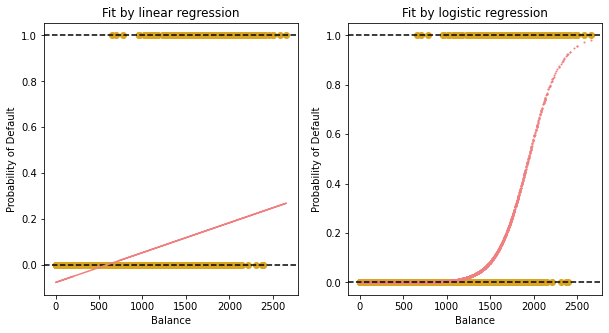

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1,2,1)
plt.axhline(y = 1, color = 'k', linestyle = '--')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.scatter(df['balance'],y, c='goldenrod')
plt.plot(df['balance'], y_pred_lin, c='lightcoral')
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.title('Fit by linear regression')

plt.subplot(1,2,2)
plt.axhline(y = 1, color = 'k', linestyle = '--')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.scatter(df['balance'],y, c='goldenrod')
plt.scatter(df['balance'], y_pred_log, c='lightcoral', s=1)
plt.xlabel('Balance')
plt.ylabel('Probability of Default')
plt.title('Fit by logistic regression')

**Optimization Problem**

* ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£ maximize log likelihood function ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏´‡∏≤‡∏Ñ‡πà‡∏≤ $\beta$ ‡πÇ‡∏î‡∏¢‡∏à‡∏≤‡∏Å‡∏Å‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏Å‡∏≤‡∏£ maximize ‡∏à‡∏∞‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô minimize ‡πÑ‡∏î‡πâ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô negative log likelihood function


In [8]:
from scipy.optimize import minimize

In [9]:
X_ = X.to_numpy().reshape(10000,2)
y_ = y.to_numpy().reshape(10000,1)
def objective_function(b):
  f = float(-sum((X_*y_)@b) + sum(np.log(1+np.exp(X_@b))))
  return  f
x0 = np.array([[-8],[0]])
res = minimize(objective_function,x0)
print(res)

<ipython-input-9-a36da1141f0f>:7: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(objective_function,x0)
<ipython-input-9-a36da1141f0f>:4: RuntimeWarning: overflow encountered in exp
  f = float(-sum((X_*y_)@b) + sum(np.log(1+np.exp(X_@b))))
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-9-a36da1141f0f>:4: RuntimeWarning: overflow encountered in exp
  f = float(-sum((X_*y_)@b) + sum(np.log(1+np.exp(X_@b))))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 798.225842012912
        x: [-1.065e+01  5.499e-03]
      nit: 9
      jac: [ 4.730e-04  7.991e-01]
 hess_inv: [[ 1.415e-01 -8.484e-05]
            [-8.484e-05  5.252e-08]]
     nfev: 113
     njev: 31


**Cofounding Problem:** a result obtained from one predictor is different from using multiple predictors  when there are correlation among predictors.

* ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£ fit logistic regression ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏Ñ‡πà‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ student ‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏ï‡∏±‡∏ß‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏à‡∏∞‡∏û‡∏ö‡∏ß‡πà‡∏≤‡∏Ñ‡πà‡∏≤ coefficient ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡∏ö‡∏ß‡∏Å (students are likely to be default) ‡πÅ‡∏ï‡πà‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ô‡∏≥‡∏°‡∏≤ fit ‡πÅ‡∏ö‡∏ö multiple logistic regression ‡∏à‡∏∞‡∏û‡∏ö‡∏ß‡πà‡∏≤ ‡∏Ñ‡πà‡∏≤ coefficient ‡∏Ç‡∏≠‡∏á student ‡∏Å‡∏•‡∏≤‡∏¢‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡∏ï‡∏¥‡∏î‡∏•‡∏ö ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å student status ‡∏Å‡∏±‡∏ö balance ‡∏°‡∏µ correlation ‡∏Å‡∏±‡∏ô ‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡∏à‡∏≤‡∏Å box plot ‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á‡πÑ‡∏î‡πâ ‡∏ã‡∏∂‡πà‡∏á student ‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏°‡∏µ balance ‡∏™‡∏π‡∏á (‡∏´‡∏ô‡∏µ‡πâ‡∏™‡∏π‡∏á) ‡∏ã‡∏∂‡πà‡∏á‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ probability ‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô default ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏™‡∏π‡∏á 

* ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏û‡∏¥‡∏à‡∏≤‡∏£‡∏ì‡∏≤‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏≤‡∏ü‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á‡∏à‡∏∞‡∏û‡∏ö‡∏ß‡πà‡∏≤ student ‡∏ó‡∏µ‡πà given balance ‡∏°‡∏≤‡∏à‡∏∞‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏ó‡∏µ‡πà‡∏à‡∏∞ default ‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤ non-student ‡∏ó‡∏µ‡πà‡∏£‡∏π‡πâ balance ‡πÅ‡∏ï‡πà student ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡πÄ‡∏°‡∏∑‡πà‡∏≠‡πÑ‡∏°‡πà‡∏£‡∏π‡πâ balance ‡∏à‡∏∞‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏ó‡∏µ‡πà‡∏à‡∏∞ default ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤

* ‡∏î‡∏±‡∏á‡∏ô‡∏±‡πâ‡∏ô ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏£‡∏π‡πâ balance non-student ‡∏à‡∏∞‡∏°‡∏µ‡πÇ‡∏≠‡∏Å‡∏≤‡∏™ default ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ ‡πÅ‡∏ï‡πà ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡πÑ‡∏°‡πà‡∏£‡∏π‡πâ balance student ‡∏à‡∏∞‡∏°‡∏µ‡πÇ‡∏≠‡∏Å‡∏≤‡∏™ default ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤



In [10]:
df_ = df.replace(to_replace=["Yes","No"],value=[1,0])
X = df_['student']
X = sm.add_constant(X)
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                0.004097
Time:                        05:02:35   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student        0.4049      0.

In [11]:
df_ = df.replace(to_replace=["Yes","No"],value=[1,0])
X = sm.add_constant(df_[['student','balance','income']])
log_reg_mul = sm.Logit(df_['default'], X).fit()
print(log_reg_mul.summary())
y_pred_log_mul = log_reg_mul.predict(X)

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.4619
Time:                        05:02:35   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student       -0.6468      0

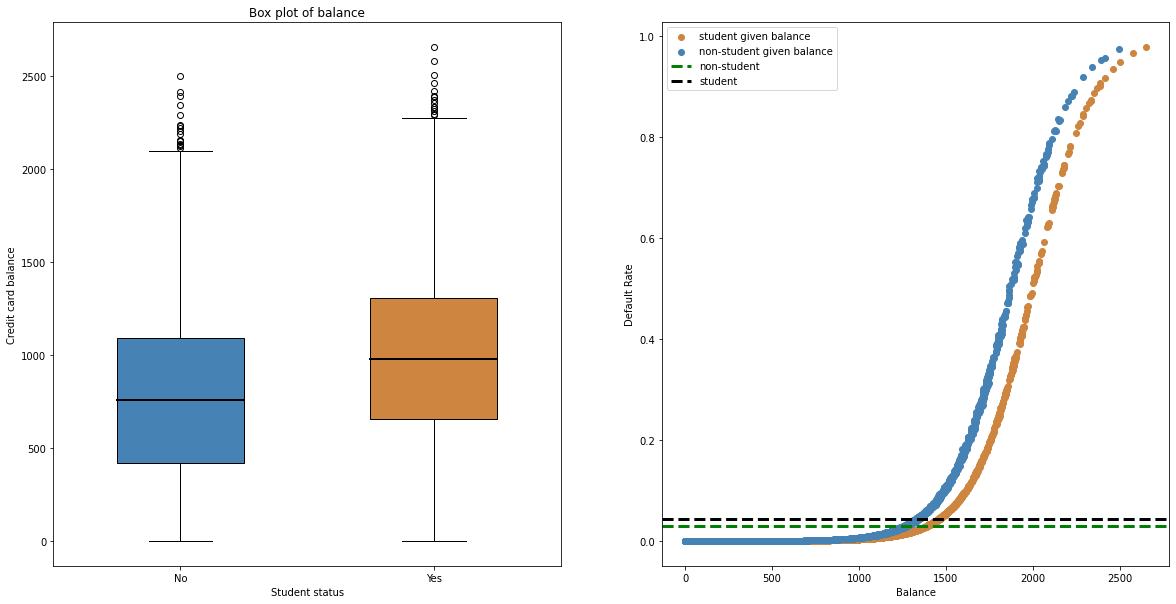

In [12]:
df_['predicted_value'] = y_pred_log_mul
df_no = df_[df['student'] == 'No']
df_yes = df_[df['student'] == 'Yes']

plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
bp = plt.boxplot([df_no['balance'], df_yes['balance']], patch_artist = True, widths=0.5)
colors = ['steelblue', 'peru']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='k',
               linewidth = 2)
plt.xticks([1, 2], ['No', 'Yes'])
plt.title('Box plot of balance')
plt.xlabel('Student status')
plt.ylabel('Credit card balance')

plt.subplot(1,2,2)
plt.scatter(df_yes['balance'], df_yes['predicted_value'], label='student given balance', c='peru')
plt.scatter(df_no['balance'], df_no['predicted_value'], label='non-student given balance', c='steelblue')
df_gb = df_.groupby(by='student').mean()
plt.axhline(y = df_gb['default'][0], color = 'g', linestyle = '--', linewidth=3, label='non-student')
plt.axhline(y = df_gb['default'][1], color = 'k', linestyle = '--',linewidth=3, label='student')
plt.ylabel('Default Rate')
plt.xlabel('Balance')
plt.legend()

**Multinomial Logistic Regression**

* Classify data into K > 2 categories
* To do this first select a single class to serve as a baseline (referenced, nominal model), choose Kth class. Then the model will be $$ Pr(Y=k|X=x) = \frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{k_p}x_p}}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}}$$  
$\text{for k = 1,2,...,K-1 and}$ 
$$ Pr(Y=K|X=x) = \frac{1}{1 + \sum_{l=1}^{K-1}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}} $$ It's not hard to show that 
$$ log(\frac{Pr(Y=k|X=x}{Pr(Y=K|X=x}) = \beta_{k0}+\beta_{k1}x_1+...+\beta_{k_p}x_p$$

* The number of coefficient is $(p+1)*(K-1)$
* The decision to choose baseline is unimportant since the fitted values, the log odds between any pairs of classes amd the other key model output will be the same.
* But, The interpretation must be aware because it is tied with the choice og baseline.

**Softmax coding**

* Treat all K classes symmetrically, and assume that for k = 1,...,K,
$$ Pr(Y=k|X=x) = \frac{e^{\beta_{k0}+\beta_{k1}x_1+...+\beta_{k_p}x_p}}{\sum_{l=1}^{K}e^{\beta_{l0}+\beta_{l1}x_1+...+\beta_{lp}x_p}} $$

* Thus, rather than estimating coefficient for K-1 classes, we actually estimate coefficient for all K classes. It's not hard to see the log odds ratio between $kth$ and $k^{'}th$ classes equals 
$$ log(\frac{Pr(Y=k|X=x)}{Pr(Y=k^{'}|X=x)}) = (\beta_{k0}-\beta_{k^{'}0})+(\beta_{k1}-\beta_{k^{'}1})x_1 +...+(\beta_{kp}-\beta_{k^{'}p})x_p $$

* widely use Machine Learning literature.

# Generative model for classification

* ‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏Ñ‡∏ô‡∏•‡∏∞‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏±‡∏ö logistic regression ‡πÇ‡∏î‡∏¢‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì posterior probability ‡∏Ç‡∏≠‡∏á Y|X ‡πÅ‡∏ó‡∏ô ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ Bayes' Rule ‡πÄ‡∏Ç‡πâ‡∏≤‡∏°‡∏≤‡∏ä‡πà‡∏ß‡∏¢ 
* Suppose that we want to classify K classes, Let $\pi_k$ represent prior probability that come from class k. Let $f_k(X)=Pr(X|Y=k)$ denote the class likelihood. Then Bayes' theorem state that $$ Pr(Y=k|X=x) = \frac{\pi_kf_k(x)}{\sum_{l=1}^K\pi_lf_l(x)} $$
* Estimating $\pi_k$ is easy if we have a random sample from a population: we simply computr the fraction of the training observation that belong to k class. To estimate $f_k(x)$, we will typically have to make simplifying assumptions.

**Linear Discriminant Analysis (LDA)**

For p = 1 case that is we only have 1 predictor
  * assume $f_k(x)$ is gaussian and variance for all classes are equal
  * Posterior probability is $$ p_k(x) = \frac{\pi_k\frac{1}{\sqrt{2\pi}œÉ}exp(-\frac{1}{2œÉ^2}(x-Œº_k)^2)}{\sum_{l=1}^K\pi_l\frac{1}{\sqrt{2\pi}œÉ}exp(-\frac{1}{2œÉ^2}(x-\mu)^2)} $$
  * Taking the log of $p_k(x)$ and rearranging the terms, it's not hard to show that this is equivalent assigning the observation to the class for which $$ \delta_k(x)=x\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + log(\pi_k) $$ is the largest. After taking log, the term $x^2/(2\sigma^2)$ will be equal for all classes, so we will emit this term in consideration.
  * If K = 2 and $\pi_1=\pi_2$, then the **Bayes classifier** assigns an observation to class 1 if $2x(\mu_1-\mu_2)>\mu_1^2-\mu_2^2$ and to class 2 otherwise. The Bayes decision boundary is the point for which $\delta_1(x)=\delta_2(x)$; one can show that this amounts to $$ x = \frac{\mu_1^2-\mu_2^2}{2(\mu_1-\mu_2)} = \frac{\mu_1+\mu_2}{2} $$
  * From the example below, If we assume that an observation is euqally likely to come from either class then by inspection we see that the Bayes classifer assign to class 1 if x is less than 0 and class to otherwise. Note that we can compute Bayes decision boundary because we know that X is drawn from what distribution within each class, and we know all the paremeter involve. In a real-life situation, we are not able to calculate the Bayes classifier.
  * In practice, we have to estimate the parameter $\mu_k$ and $\pi_k$ and $\sigma^2$ which using this equations: $$ \mu_k = \frac{1}{n_k}\sum_{i:y_i=k}x_i \text{,  } \hat{\sigma}^2 = \frac{1}{n-k}\sum_{k=1}^K\sum_{i:y_i=k}(x_i-\hat{\mu_k})^2\text{,  } \pi_k = \frac{n_k}{n} $$


For p > 1
  *  The posterior probability is $$ p_k(x) =  \frac{\pi_k exp(-\frac{1}{2}(x-Œº_k)^Tùö∫^{-1}(x-Œº_k))}{\sum_{l=1}^K\pi_lexp(-\frac{1}{2}(x-Œº_l)^Tùö∫^{-1}(x-Œº_l))} $$
  * Taking the log of $p_k(x)$ and rearranging the terms, it's not hard to show that this is equivalent assigning the observation to the class for which $$ \delta_k(x)= x^Tùö∫^{-1}\mu_k - \frac{1}{2}\mu_k^Tùö∫^{-1}\mu_k + log(\pi_k) $$ is the largest.
  * To make a decision boundary, we will let $\delta_1(x) = \delta_2(x)$, so this boudary decision is linear in $x$.


**In summary, The LDA classifier results from assuming that the observation within each class come from a normal distribution with a class specific mean and a common covariance.**


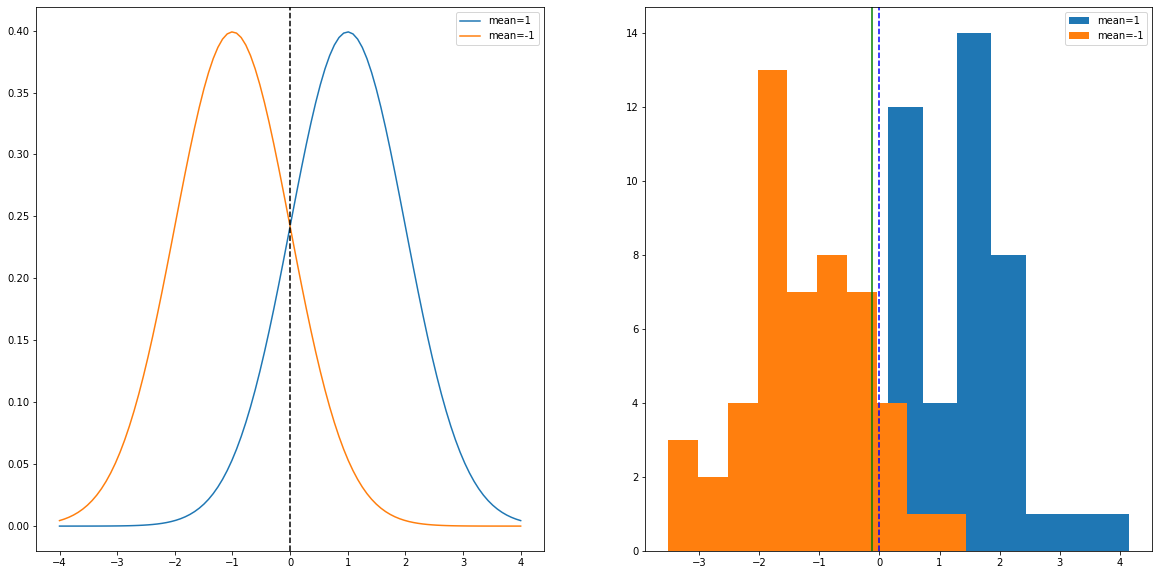

In [45]:
plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)
x = np.linspace(-4,4, 100)
plt.plot(x, norm.pdf(x,1,1), label='mean=1')
plt.plot(x, norm.pdf(x,-1,1), label='mean=-1')
plt.axvline(0, c='k', linestyle='--')
plt.legend()

plt.subplot(1,2,2)
x1 = np.random.normal(loc=1.0, scale=1.0, size=50)
x2 = np.random.normal(loc=-1.0, scale=1.0, size=50)
mu1 = np.mean(x1)
mu2 = np.mean(x2)
plt.hist(x1,label='mean=1')
plt.hist(x2,label='mean=-1')
plt.axvline(0, c='b', linestyle='--')
plt.axvline((mu1+mu2)/2,c='g')
plt.legend()

**Quadratic Discriminant Analysis (QDA)**

  * Like LDA, the QDA classifier results from assuming that the observations from each class are drwan from a guassian distribution, and plugging for the parameter into Bayes' theorem in order to perform prediction. However, in contrast to LDA, QDA asuume that each class has covariance matrix. That is assume that observations form the kth class is of the form X is $Normal(\mu_k,Œ£_k)$. Under this assumption, Bayes classifier assign an observation to the class for which $$ \delta_k(x)= -\frac{1}{2}x^TŒ£_k^{-1}x + x^TŒ£^{-1}_k\mu_k - \frac{1}{2}\mu_k^TŒ£^{-1}_k\mu_k - \frac{1}{2}log|Œ£_k| + log(\pi_k)  $$ is the largest. 
  * From $ \delta_k(x)$, the decision boundary is quadratic in $x$.



In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [156]:
np.random.seed(1)
x_1 = np.random.multivariate_normal([0,1], [[2,1],[1,2]], 100)
x_2 = np.random.multivariate_normal([2,2], [[2,1],[1,2]],100)
y = np.concatenate((np.ones((100,1)), 2*np.ones((100,1))))
X1 = np.concatenate((x_1,x_2), axis=0)
np.random.seed(2)
x_3 = np.random.multivariate_normal([0,1], [[1,1],[1,2]], 100)
x_4 = np.random.multivariate_normal([2,2], [[1,0.5],[0.5,3]],100)
X2 = np.concatenate((x_3,x_4), axis=0)

In [157]:
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X1, y)
qda1 = QuadraticDiscriminantAnalysis()
qda1.fit(X1, y)

lda2 = LinearDiscriminantAnalysis()
lda2.fit(X2, y)
qda2 = QuadraticDiscriminantAnalysis()
qda2.fit(X2, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

QuadraticDiscriminantAnalysis()

<ipython-input-159-edaa5f87b494>:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
<ipython-input-159-edaa5f87b494>:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')
<ipython-input-159-edaa5f87b494>:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
<ipython-input-159-edaa5f87b494>:28: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')


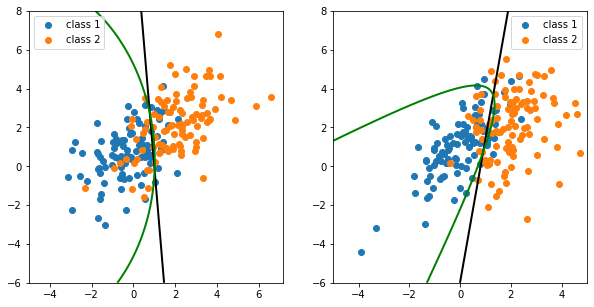

In [159]:
plt.subplots(1,2, figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x_1[:,0],x_1[:,1], label='class 1')
plt.scatter(x_2[:,0],x_2[:,1], label='class 2')
nx, ny = 400, 400
xx, yy = np.meshgrid(np.linspace(-5, 5, nx), np.linspace(-6, 8, ny))
a=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
Z = lda1.predict_proba(a)
Z = Z[:, 1].reshape(xx.shape)
Z2 = qda1.predict_proba(a)
Z2 = Z2[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x_3[:,0],x_3[:,1], label='class 1')
plt.scatter(x_4[:,0],x_4[:,1], label='class 2')
nx, ny = 400, 400
xx, yy = np.meshgrid(np.linspace(-5, 5, nx), np.linspace(-6, 8, ny))
a=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
Z = lda2.predict_proba(a)
Z = Z[:, 1].reshape(xx.shape)
Z2 = qda2.predict_proba(a)
Z2 = Z2[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black", label='LDA')
plt.contour(xx, yy, Z2, [0.5], linewidths=2.0, colors="g", label='QDA')
plt.legend()

* From the above example, in the left hand, The two gaussian classes have a common correlation. As a result, the Bayes decision boundary is linear and is accurately approximated by LDA decision boundary. The QDA decision boundary is inferior, because it suffers from higher variance without a corresponding decrease in bias. In contrast, the right hand figure displays a situation in which the two classes have different covriance matrix. Now the Bayes decision boundary is quadratic, and so QDA more accurately approximates this boundary than does LDA.


**Naive Bayes**

*  The assumption of this approach is that input $X_k$'s are conditionally independent 